<a href="https://colab.research.google.com/github/apester/IME/blob/main/Lab_7_1_CNN_vs_Dense_Lab_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 7: CNN vs Dense Networks on MNIST and CIFAR-10

This notebook illustrates the advantages of CNNs compared to dense neural networks using MNIST and CIFAR-10 datasets.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

## MNIST Dataset Comparison

In [ ]:
# MNIST data preprocessing
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train_cat, y_test_cat = to_categorical(y_train), to_categorical(y_test)
x_train_cnn, x_test_cnn = x_train[..., np.newaxis], x_test[..., np.newaxis]

In [ ]:
dense_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

dense_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

dense_history = dense_model.fit(x_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.1)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8288 - loss: 0.6273 - val_accuracy: 0.9612 - val_loss: 0.1440
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9532 - loss: 0.1573 - val_accuracy: 0.9725 - val_loss: 0.0989
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9688 - loss: 0.1035 - val_accuracy: 0.9725 - val_loss: 0.0969
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9780 - loss: 0.0746 - val_accuracy: 0.9730 - val_loss: 0.0951
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9830 - loss: 0.0586 - val_accuracy: 0.9760 - val_loss: 0.0811


In [ ]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(x_train_cnn, y_train_cat, epochs=5, batch_size=128, validation_split=0.1)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 89ms/step - accuracy: 0.8421 - loss: 0.5767 - val_accuracy: 0.9787 - val_loss: 0.0690
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 89ms/step - accuracy: 0.9780 - loss: 0.0735 - val_accuracy: 0.9828 - val_loss: 0.0575
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 88ms/step - accuracy: 0.9852 - loss: 0.0485 - val_accuracy: 0.9853 - val_loss: 0.0503
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.9892 - loss: 0.0335 - val_accuracy: 0.9898 - val_loss: 0.0349
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 92ms/step - accuracy: 0.9898 - loss: 0.0322 - val_accuracy: 0.9882 - val_loss: 0.0405


In [ ]:
dense_loss, dense_acc = dense_model.evaluate(x_test, y_test_cat, verbose=0)
cnn_loss, cnn_acc = cnn_model.evaluate(x_test_cnn, y_test_cat, verbose=0)

print(f"Dense Test Accuracy: {dense_acc:.4f}")
print(f"CNN Test Accuracy: {cnn_acc:.4f}")


Dense Test Accuracy: 0.9736
CNN Test Accuracy: 0.9896


In [ ]:
dense_model.summary()
cnn_model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365,792 (1.40 MB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,862 (952.59 KB)

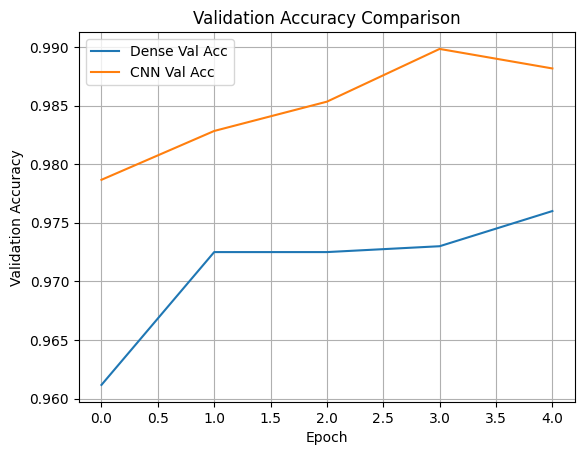

In [ ]:
plt.plot(dense_history.history['val_accuracy'], label='Dense Val Acc')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Validation Accuracy Comparison')
plt.grid(True)
plt.show()


# Extension Task: Apply CNN vs Dense on CIFAR-10

In [ ]:
# CIFAR-10 Comparison: CNN vs Dense Network
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [ ]:
# Normalize data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:
# Dense Network Model
dense_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

dense_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train Dense Network
history_dense = dense_model.fit(
    x_train, y_train_cat,
    epochs=10, batch_size=128,
    validation_split=0.1
)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.2555 - loss: 2.1475 - val_accuracy: 0.3750 - val_loss: 1.7376
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.3897 - loss: 1.7031 - val_accuracy: 0.3984 - val_loss: 1.6916
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.4260 - loss: 1.6228 - val_accuracy: 0.4290 - val_loss: 1.6041
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.4490 - loss: 1.5558 - val_accuracy: 0.4360 - val_loss: 1.5824
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.4551 - loss: 1.5201 - val_accuracy: 0.4378 - val_loss: 1.5533
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.4802 - loss: 1.4680 - val_accuracy: 0.4518 - val_loss: 1.5322
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.4909 - loss: 1.4393 - val_accuracy: 0.4816 - val_loss: 1.4600
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.4967 - loss: 1.4257 - 

In [ ]:
# Evaluate Dense Network
dense_test_loss, dense_test_acc = dense_model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Dense Network Test Accuracy: {dense_test_acc:.4f}")

Dense Network Test Accuracy: 0.4859


In [ ]:
# CNN Model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train CNN
history_cnn = cnn_model.fit(
    x_train, y_train_cat,
    epochs=10, batch_size=128,
    validation_split=0.1
)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 51s 139ms/step - accuracy: 0.3394 - loss: 1.8080 - val_accuracy: 0.5270 - val_loss: 1.3485
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 49s 139ms/step - accuracy: 0.5567 - loss: 1.2482 - val_accuracy: 0.5938 - val_loss: 1.1456
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 49s 138ms/step - accuracy: 0.6092 - loss: 1.1046 - val_accuracy: 0.6346 - val_loss: 1.0523
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 82s 137ms/step - accuracy: 0.6511 - loss: 0.9976 - val_accuracy: 0.6644 - val_loss: 0.9862
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 47s 133ms/step - accuracy: 0.6785 - loss: 0.9270 - val_accuracy: 0.6810 - val_loss: 0.9594
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 84s 137ms/step - accuracy: 0.7022 - loss: 0.8591 - val_accuracy: 0.6838 - val_loss: 0.9203
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 81s 136ms/step - accuracy: 0.7186 - loss: 0.8095 - val_accuracy: 0.6860 - val_loss: 0.9332
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 46s 132ms/step - accuracy: 0.7385 - loss: 0

In [ ]:
# Evaluate CNN
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test_cat, verbose=0)
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}")

CNN Test Accuracy: 0.6981


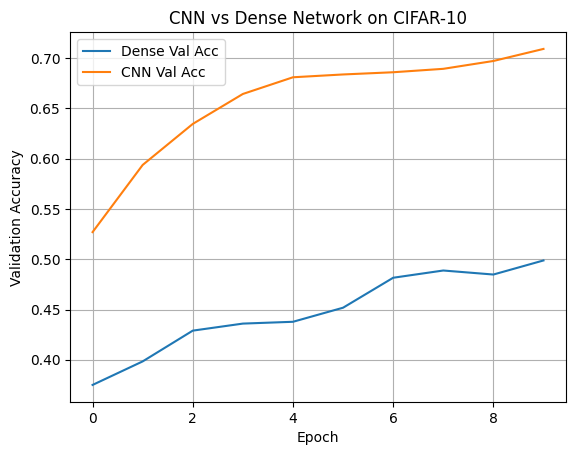


Dense Network Summary:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121,824 (19.54 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,414,550 (13.03 MB)


CNN Model Summary:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 947,168 (3.61 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 631,446 (2.41 MB)

In [ ]:
# Plot Validation Accuracy Comparison
plt.plot(history_dense.history['val_accuracy'], label='Dense Val Acc')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('CNN vs Dense Network on CIFAR-10')
plt.legend()
plt.grid(True)
plt.show()

# Print Parameter Counts
print("\nDense Network Summary:")
dense_model.summary()

print("\nCNN Model Summary:")
cnn_model.summary()
